In [1]:
import numpy as np
import matplotlib.pyplot as plt

from thermohl import solver

In [5]:
def example_all_params(dic):
    model = [
        dict(label="cigre", model=solver.cigre(dic)),
        dict(label="rte", model=solver.rte(dic)),
        dict(label="ieee", model=solver.ieee(dic)),
        dict(label="olla", model=solver.olla(dic)),
    ]
    fig, ax = plt.subplots(nrows=4, ncols=3)
    for i, item in enumerate(model):
        label = item['label']
        slvr = item['model']
        fig.text(0.04,
                 0.92 - i * (1 / 4),
                 label,
                 va='center', ha='left', fontsize=12, fontweight='bold')
        dtemp = slvr.steady_temperature()
        Trep=50
        damp = slvr.steady_intensity(Trep)
        ax[i,0].plot(slvr.args.hour, dtemp['t'], c='C0', label='Conductor temperature (C)')

        ax[i,0].axhline(Trep, ls="--", c='C1', label="Maximum temperature for ampacity")
        ax[i,1].plot(slvr.args.hour, slvr.args.I, c='C0', label="Transit (A)")
        ax[i,1].plot(slvr.args.hour, damp['I'], c='C1', label='Conductor ampacity (A)')
        ax[i,2].plot(slvr.args.hour, dtemp['P_solar'], label="Solar heating power (W/m)")
        for j in range(3):
            ax[i,j].grid(True)
            ax[i,j].legend()
        ax[i,2].set_xlabel("Hour")
    %matplotlib inline
    plt.show()

In [6]:
dic = dict(
        lat=46.1,
        lon=2.0,
        alt=123.,
        azm=31.,
        month=6,
        day=20,
        hour=np.linspace(0., 23., 24),
        I=np.array([400. for i in range(12)] + [700. for i in range(12)]),
        Ta=13,
        Pa=1.6e05,
        rh=0.6,
        pr=1,
        ws=1,
        wa=85,
        al=0.4,
        tb=0.5,
        m=2,
        d=2e-0,
        D=2.0e-02,
        a=3.84e-04,
        A=6.07e-04,
        R=3.0e-02,
        l=1.5,
        c=550.0,
        alpha=0.7,
        epsilon=0.7,
        RDC20=3e-05,
        km=1.06,
        ki=0.018,
        kl=4e-03,
        kq=6.0e-07,
        RDCHigh=4.05e-05,
        RDCLow=2.99e-05,
        THigh=65.0,
        TLow=29.0
    )

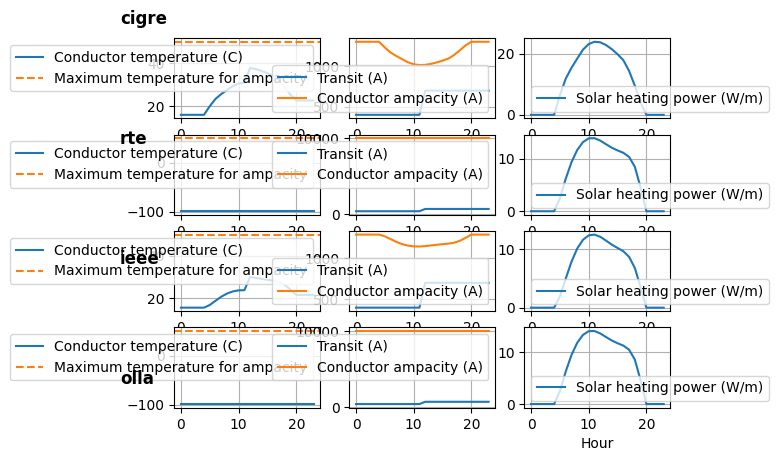

In [7]:
example_all_params(dic)